## Implementasi Linear Discriminant Analysis

In [12]:
# Import pustaka atau library yang akan digunakan

import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [23]:
#Mendefinisikan data fitur (X) dan label kelas (y)

data = {
    'x1': [0, 0, 1, -1, 2, 4, 3, 5, 1, -2, 4, 3],
    'x2': [2, 0, 1, 1, 2, 0, -1, 2, -2, 2, -2, 3],
    'kelas': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'B']
}

df = pd.DataFrame(data)

X = df[['x1', 'x2']].values #
y= df['kelas'].values #target

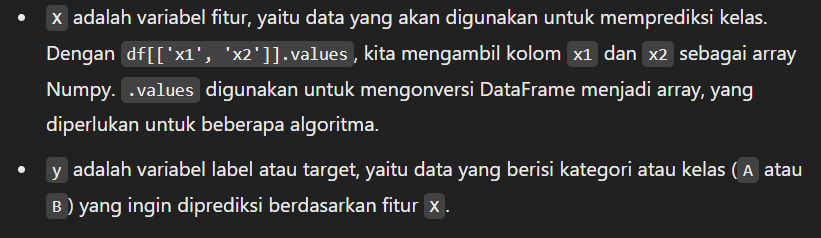

In [24]:
#Menghitung mean untuk setiap kelas

mean_A = X[y == 'A'].mean(axis=0)
mean_B = X[y == 'B'].mean(axis=0)

print("Mean Kelas A:", mean_A)
print("Mean Kelas B:", mean_B)

Mean Kelas A: [-0.16666667  0.66666667]
Mean Kelas B: [3.5        0.66666667]


In [25]:
#Menghitung matriks scatter dalam kelas (Sw)
Sw = np.zeros((2, 2))
for i in range(len(X)):  #setiap iterasi, kita akan menghitung kontribusi scatter dari setiap sampel terhadap kelasnya.
  x = X[i].reshape(2, 1) #X[i] adalah vektor fitur untuk sampel ke-i dan .reshape(2, 1) mengubah vektor X[i] menjadi matriks kolom berukuran 2x1, sehingga mudah untuk perhitungan matriks.
  if y[i] == 'A': #Mengecek apakah sampel tersebut milik kelas 'A' atau 'B'
    mean_vec = mean_A.reshape(2, 1) #mean_vec diset sebagai vektor rata-rata dari kelas tersebut (mean_A atau mean_B)
  else:
    mean_vec = mean_B.reshape(2, 1) #yang juga diubah menjadi matriks kolom berukuran 2x1.
  Sw += (x - mean_vec).dot((x - mean_vec).T)

print("Within-Class Scatter Matrix (Sw):\n", Sw)

Within-Class Scatter Matrix (Sw):
 [[12.33333333 -7.33333333]
 [-7.33333333 30.66666667]]


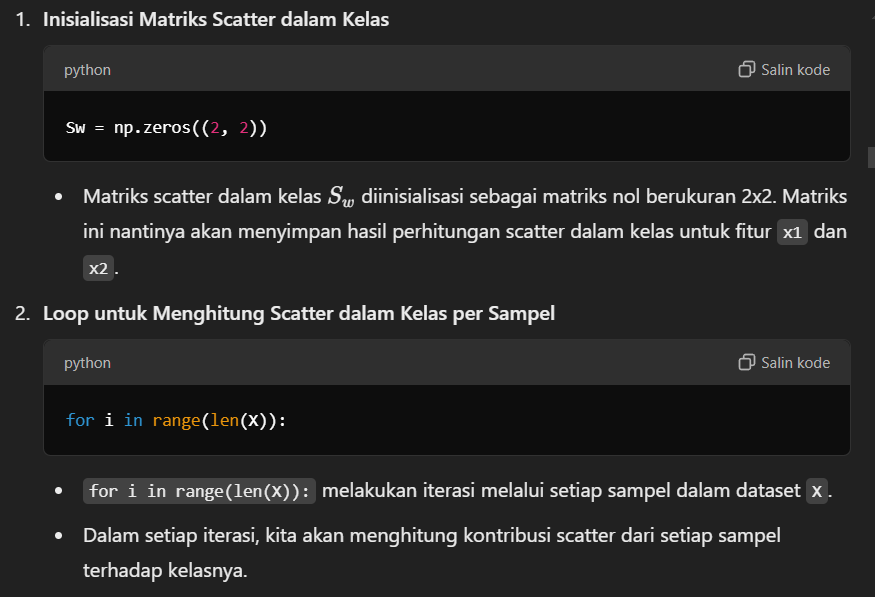

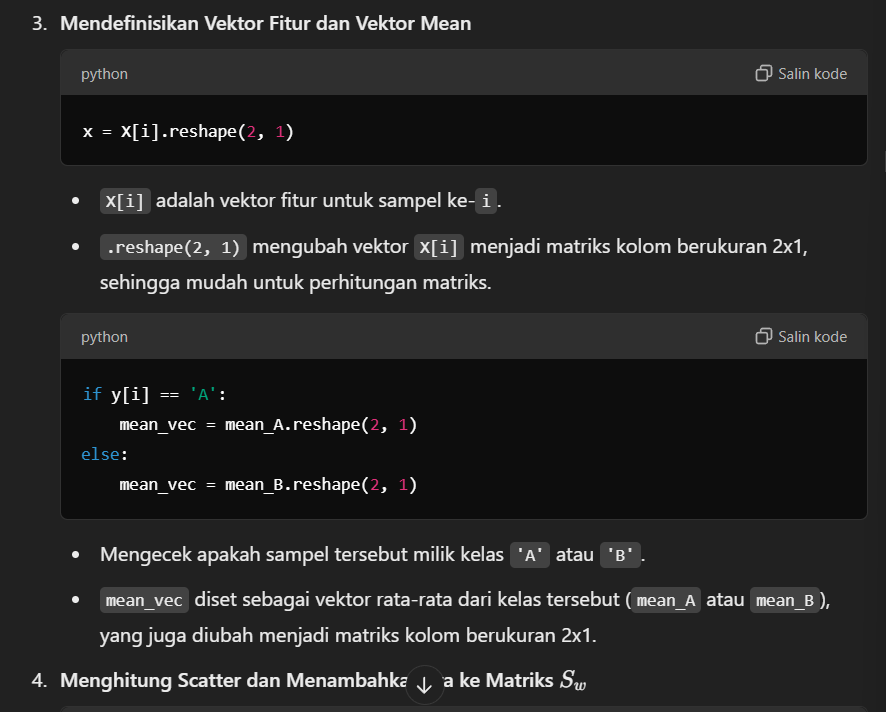

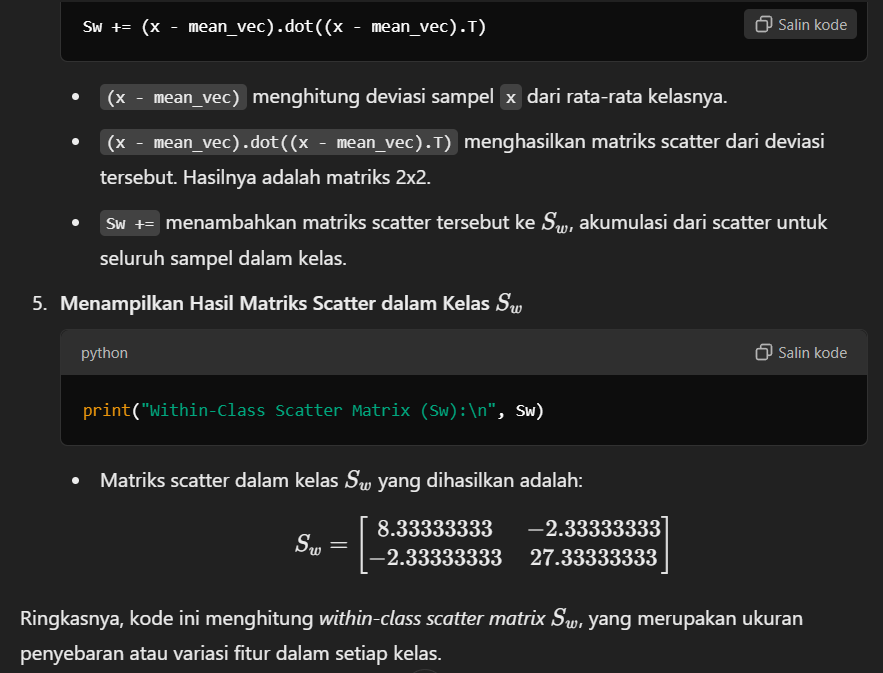

In [26]:
#Menghitung matriks scatter antar kelas (Sb)
mean_total = np.mean(X, axis=0).reshape(2, 1)
mean_A = mean_A.reshape(2, 1)
mean_B = mean_B.reshape(2, 1)

Sb = 5 * (mean_A - mean_total).dot((mean_A - mean_total).T) + \
     5 * (mean_B - mean_total).dot((mean_B - mean_total).T)

print("Between-Class Scatter Matrix (Sb):\n", Sb)

Between-Class Scatter Matrix (Sb):
 [[33.61111111  0.        ]
 [ 0.          0.        ]]


jika ada 3 kelas

# Mendefinisikan mean dari setiap kelas
mean_total = np.mean(X, axis=0).reshape(2, 1)
mean_A = mean_A.reshape(2, 1)
mean_B = mean_B.reshape(2, 1)
mean_C = np.mean(X[y == 'C'], axis=0).reshape(2, 1)

# Mendefinisikan jumlah sampel di setiap kelas
n_A = np.sum(y == 'A')
n_B = np.sum(y == 'B')
n_C = np.sum(y == 'C')

# Menghitung matriks scatter antar kelas (Sb)
Sb = n_A * (mean_A - mean_total).dot((mean_A - mean_total).T) + \
     n_B * (mean_B - mean_total).dot((mean_B - mean_total).T) + \
     n_C * (mean_C - mean_total).dot((mean_C - mean_total).T)

print("Between-Class Scatter Matrix (Sb):\n", Sb)


In [17]:
#Menyelesaikan persamaan nilai eigen
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(Sw).dot (Sb))
print("Nilai Eigen:\n", eig_vals)
print("Vektor Eigen:\n", eig_vecs)

Nilai Eigen:
 [0.         3.17694064]
Vektor Eigen:
 [[0.         0.97257889]
 [1.         0.23257321]]


In [18]:
# Menghitung proporsi kontribusi variansi antar kelas dari nilai eigen
explained_variance_ratio = eig_vals / np.sum(eig_vals)

# Menentukan jumlah dimensi yang menjelaskan lebih dari 95% variansi
num_components = np.argmax(np.cumsum(explained_variance_ratio) >= 0.95) + 1

print(f"Jumlah dimensi yang menjelaskan 95% variansi: {num_components}")

Jumlah dimensi yang menjelaskan 95% variansi: 2


In [19]:
#Memilih vektor eigen dengan nilai eigen tertinggi
idx= np.argmax(eig_vals)  # mencari indeks dari nilai eigen terbesar dalam array
w = eig_vecs[:, idx]
print("Vektor Proyeksi (w):\n", w)

Vektor Proyeksi (w):
 [0.97257889 0.23257321]


In [20]:
# Menyortir nilai eigen dari yang terbesar
# 2 NILAI EIGEN
#idx = np.argsort(eig_vals)[::-1][:2]  # Menyortir nilai eigen terbesar dan memilih dua nilai terbesar

# Memilih dua vektor eigen terkait
#w = eig_vecs[:, idx]

#print("Vektor Proyeksi (w) untuk dua nilai eigen terbesar:\n", w)

In [21]:
#Memproyeksikan data ke dimensi yang lebih rendah
X_lda = X.dot (w)
print("Data setelah proyeksi LDA: \n", X_lda)

Data setelah proyeksi LDA: 
 [ 0.46514643  0.          1.2051521  -0.74000568  2.41030421  3.89031557
  2.68516346  5.32804088  0.50743247 -1.48001136  3.42516914  3.61545631]


In [22]:
# Implementasi LDA menggunakan Scikit-Learn untuk perbandingan
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda_sklearn = lda.fit_transform(X, y)
print("Data setelah proyeksi LDA (Scikit-Learn): \n", X_lda_sklearn)

Data setelah proyeksi LDA (Scikit-Learn): 
 [[-1.31037915]
 [-1.77535239]
 [-0.57064898]
 [-2.51508256]
 [ 0.63405443]
 [ 2.11351475]
 [ 0.90881134]
 [ 3.55070478]
 [-1.26810885]
 [-3.25481272]
 [ 1.64854151]
 [ 1.83875783]]


Latihan mandiri

In [ ]:
https://drive.google.com/file/d/1Mx98e1s4ubr8QQrUF8xmxwtDbtu-TgPz/view?usp=sharing